In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import koreanize_matplotlib
import statsmodels.tsa.api as tsa

In [2]:
df = pd.read_csv('data/kpa215.csv')
print(df.shape)
df.head(5)

(46268, 9)


,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부
0,충남청,2020-12-01 15:06:38,충남청,종결요청,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN
1,충남청,2020-12-01 14:53:20,충남청,종결요청,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN
2,충남청,2020-12-01 11:15:43,충남청,종결요청,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN
3,충남청,2020-12-01 13:08:09,충남청,종결요청,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN
4,충남청,2020-12-01 14:00:07,충남청,종결요청,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN


In [3]:
df.sort_values('접수완료일시', ignore_index=True, inplace=True)
df.loc[df['접수부서'].str.contains('대전'), '접수부서'] = '대전청'
df.loc[df['접수부서'].str.contains('세종'), '접수부서'] = '세종청'

In [4]:
df['접수완료일시'] = df['접수완료일시'].apply(lambda x: pd.to_datetime(x))
df['date'] = df['접수완료일시'].dt.date
df['year'] = df['접수완료일시'].dt.year
df['month'] = df['접수완료일시'].dt.month
df['day'] = df['접수완료일시'].dt.day
df['hour'] = df['접수완료일시'].dt.hour
df['ym'] = df['year'].astype('str') + '-' + df['month'].astype('str')
df['weekofday'] = df['접수완료일시'].dt.day_name()

In [5]:
df.head(2)

,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,date,year,month,day,hour,ym,weekofday
0,충남청,2020-01-02 09:33:49,충남청,종결요청,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020-01-02,2020,1,2,9,2020-1,Thursday
1,충남청,2020-01-02 09:42:45,충남청,종결요청,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020-01-02,2020,1,2,9,2020-1,Thursday


<AxesSubplot: xlabel='weekofday', ylabel='count'>

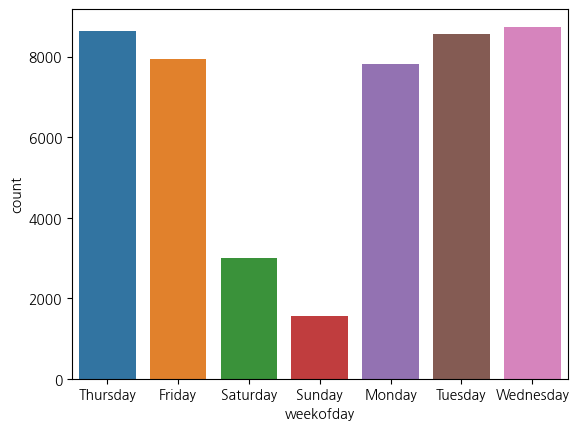

In [6]:
sns.countplot(data=df, x='weekofday')

In [7]:
sns.lineplot(data=p1, x=p1.index, y='접수완료일시')

NameError: name 'p1' is not defined

In [6]:
import re

In [25]:
df_발생 = df.dropna(subset='발생지점')

In [26]:
df_발생.isnull().sum()

접수부서          0
접수완료일시        0
경찰청구분         0
사건상태          0
성별            0
발생지점          0
발생좌표X       123
발생좌표Y       123
동일사건여부    26750
date          0
year          0
month         0
day           0
hour          0
ym            0
dtype: int64

In [27]:
def 삭제(x):
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string= x)
    return text

In [28]:
df_발생['발생지점'] = df_발생['발생지점'].map(삭제)

In [29]:
df_발생

,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,date,year,month,day,hour,ym
0,충남청,2020-01-02 09:33:49,충남청,종결요청,불상,충청남도 천안시 서북구 차암동 524,127.104436,36.841583,NaN,2020-01-02,2020,1,2,9,2020-1
1,충남청,2020-01-02 09:42:45,충남청,종결요청,불상,충청남도 아산시 풍기동 404-33,127.021875,36.771208,NaN,2020-01-02,2020,1,2,9,2020-1
2,충남청,2020-01-02 10:23:29,충남청,종결요청,불상,충청남도 서산시 대산읍 대산리 688-1,126.426100,36.947617,NaN,2020-01-02,2020,1,2,10,2020-1
3,대전청,2020-01-02 10:46:31,대전청,종결요청,불상,대전광역시 유성구 대정동 1-4,127.336373,36.317773,NaN,2020-01-02,2020,1,2,10,2020-1
4,충남청,2020-01-02 11:00:20,충남청,종결요청,불상,충청남도 논산시 내동 1113,127.104068,36.182762,NaN,2020-01-02,2020,1,2,11,2020-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46253,충남청,2023-01-17 20:26:05,충남청,종결요청,여성,충청남도 공주시 옥룡동 247-2,127.128745,36.453144,Y,2023-01-17,2023,1,17,20,2023-1
46254,충남청,2023-01-17 20:28:51,충남청,종결요청,여성,충청남도 공주시 옥룡동 247-2,127.128745,36.453144,Y,2023-01-17,2023,1,17,20,2023-1
46258,충남청,2023-01-18 10:51:29,세종청,종결요청,남성,세종특별자치시 세종시 전동면 청송리 154-2,127.257393,36.664743,NaN,2023-01-18,2023,1,18,10,2023-1
46265,대전청,2023-01-18 16:17:02,대전청,종결요청,여성,대전광역시 대덕구 신일동 1687-6,127.406900,36.437929,NaN,2023-01-18,2023,1,18,16,2023-1


# EDA

## 시계열 분석

In [77]:
df['date'].describe()

count                   46268
unique                   1094
top       2020-09-16 00:00:00
freq                      140
first     2020-01-02 00:00:00
last      2023-01-18 00:00:00
Name: date, dtype: object

In [78]:
df['date'] = pd.to_datetime(df['date'])

In [79]:
p1 = pd.pivot_table(data=df, index='date', values='접수완료일시', aggfunc='count')
p1.head(2)

,접수완료일시
date,
2020-01-02,29
2020-01-03,31


In [304]:
# 1일 단위로 시계열 index 평균값 생성
y = p1['접수완료일시'].resample('1D').mean()

In [305]:
y.loc['2020-11-23'] = 60
y.loc['2020-11-24'] = 65
y.loc['2020-11-25'] = 103
y.loc['2020-11-26'] = 112
y.loc['2020-11-27'] = 108
y.loc['2020-11-28'] = 11
y.loc['2020-11-29'] = 11
y.loc['2020-11-30'] = 60

In [306]:
y1 = y.fillna(method='ffill')

In [312]:
y1 = y.to_frame()

In [314]:
y2 = y1['접수완료일시'].resample('1W').mean()

In [318]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y2)
print(result)

(-3.9408707863783965, 0.0017538236927975496, 2, 157, {'1%': -3.472703119504854, '5%': -2.880131672353732, '10%': -2.5766826861130268}, 1095.7079616138467)


In [319]:
df_y2 = y2.to_frame()

In [328]:
from pylab import rcParams

rcParams['figure.figsize']=15,10

<AxesSubplot: xlabel='date'>

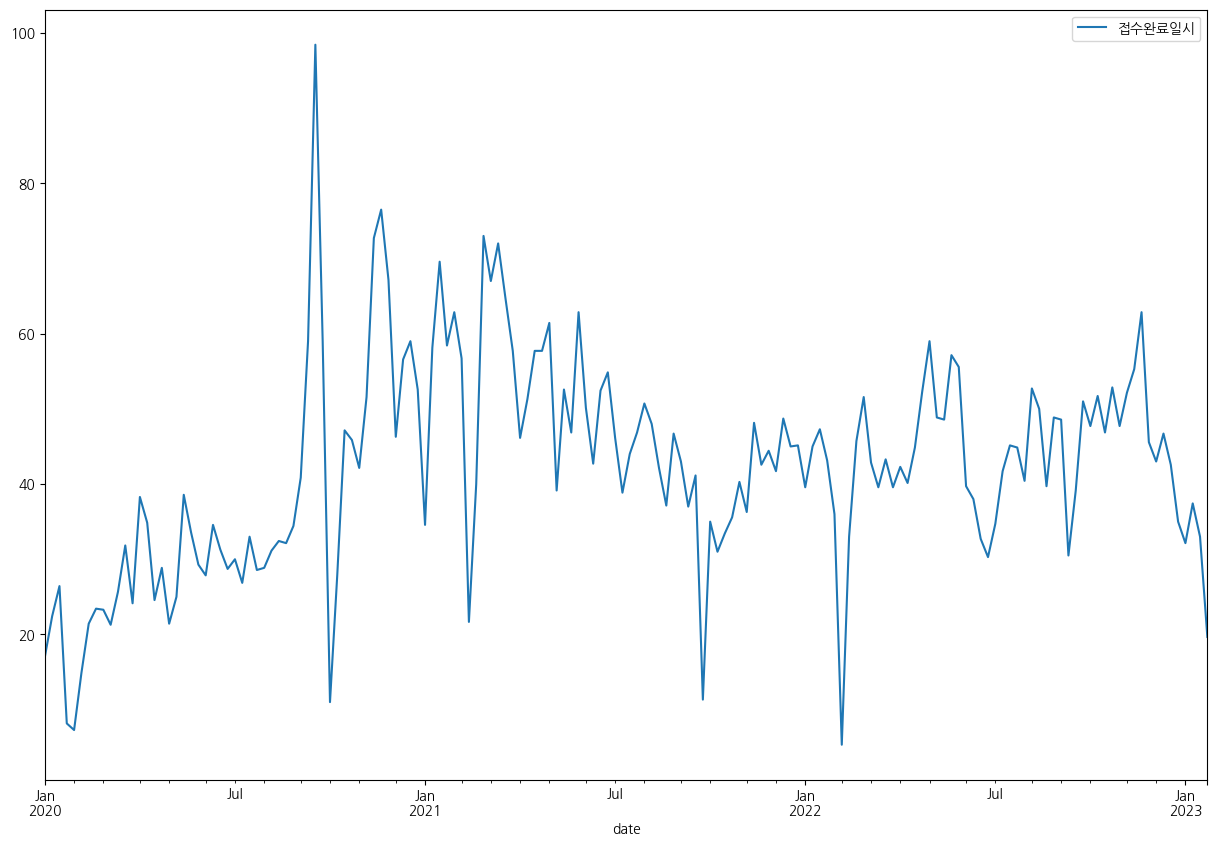

In [321]:
df_y2.plot()

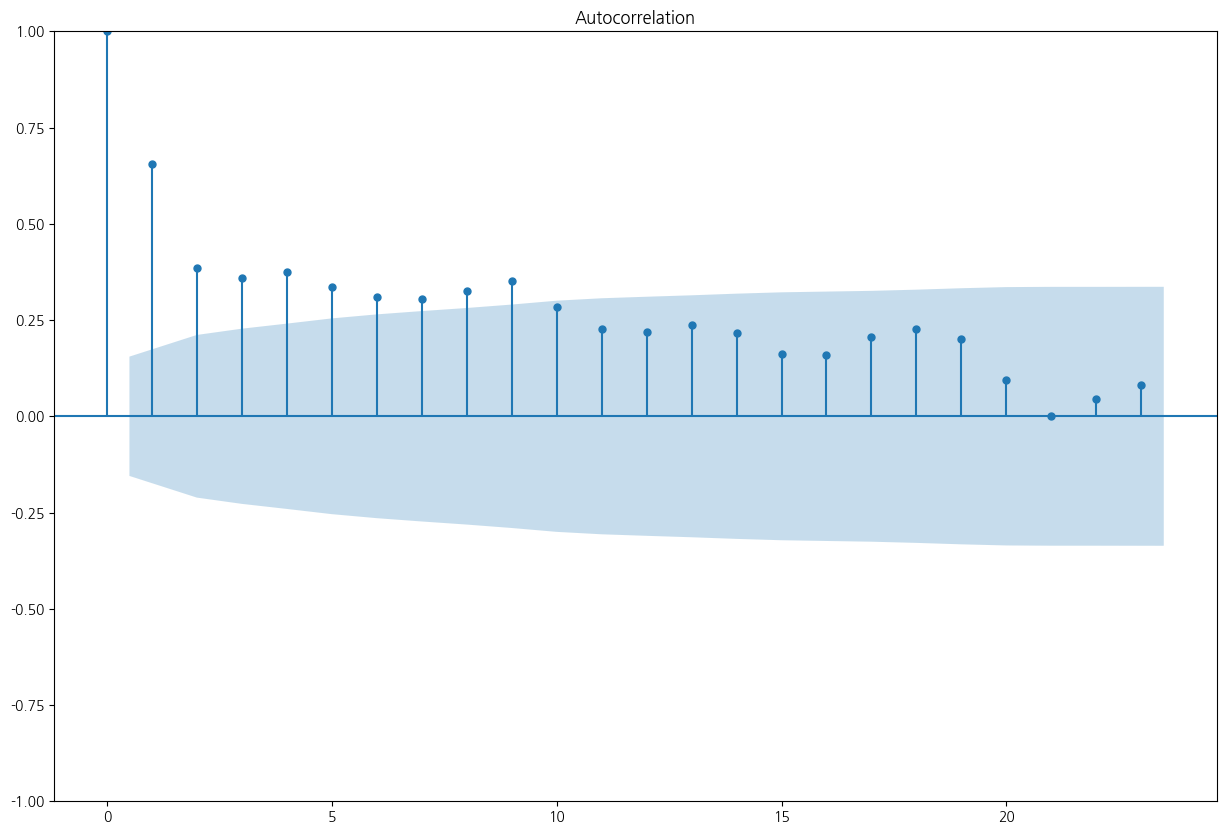

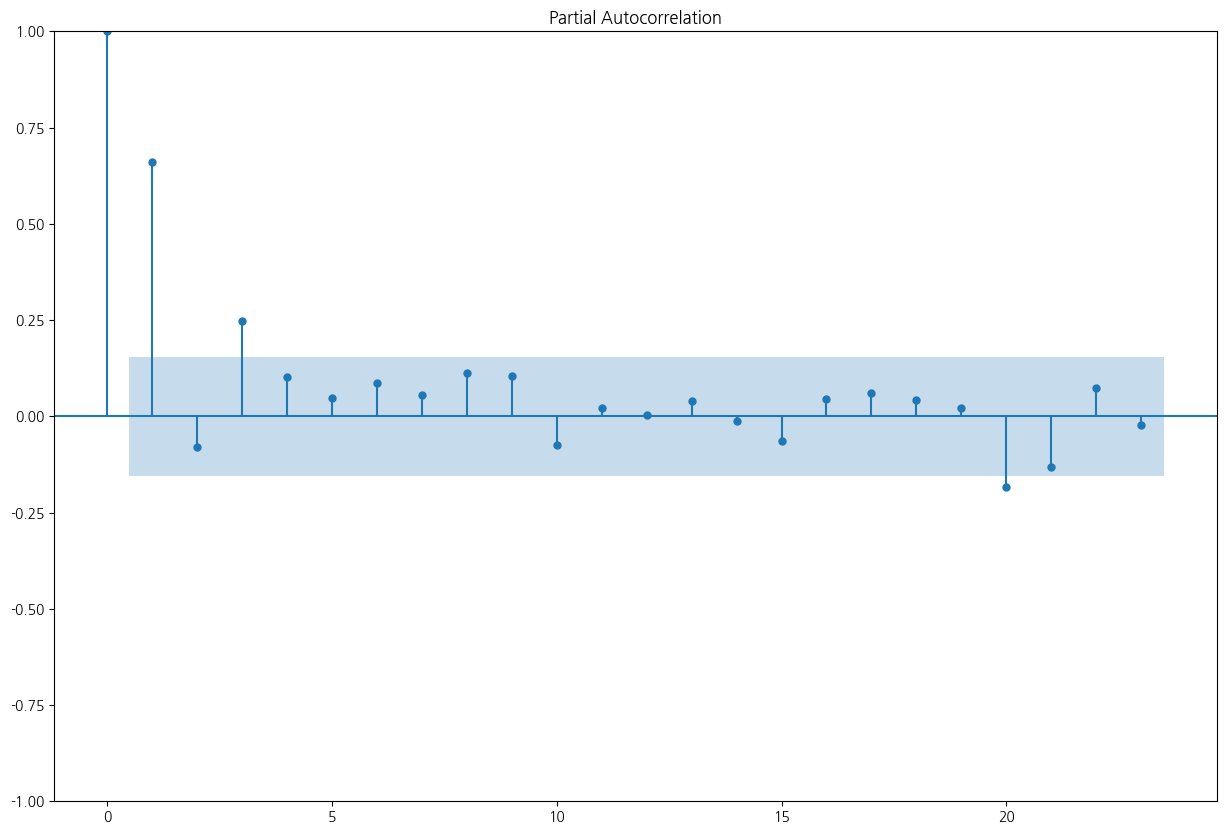

In [323]:
tsa.graphics.plot_acf(df_y2['접수완료일시'].dropna())
tsa.graphics.plot_pacf(df_y2['접수완료일시'].dropna())
plt.show()

In [385]:
df_y2['1st_diff'] = df_y2['접수완료일시'] - df_y2['접수완료일시'].shift(1)

In [388]:
# 정상성 테스트
result = adfuller(df_y2['1st_diff'].dropna())
print(result)

(-7.240613956455873, 1.888645653498274e-10, 7, 151, {'1%': -3.4744158894942156, '5%': -2.880878382771059, '10%': -2.577081275821236}, 1095.526483267838)


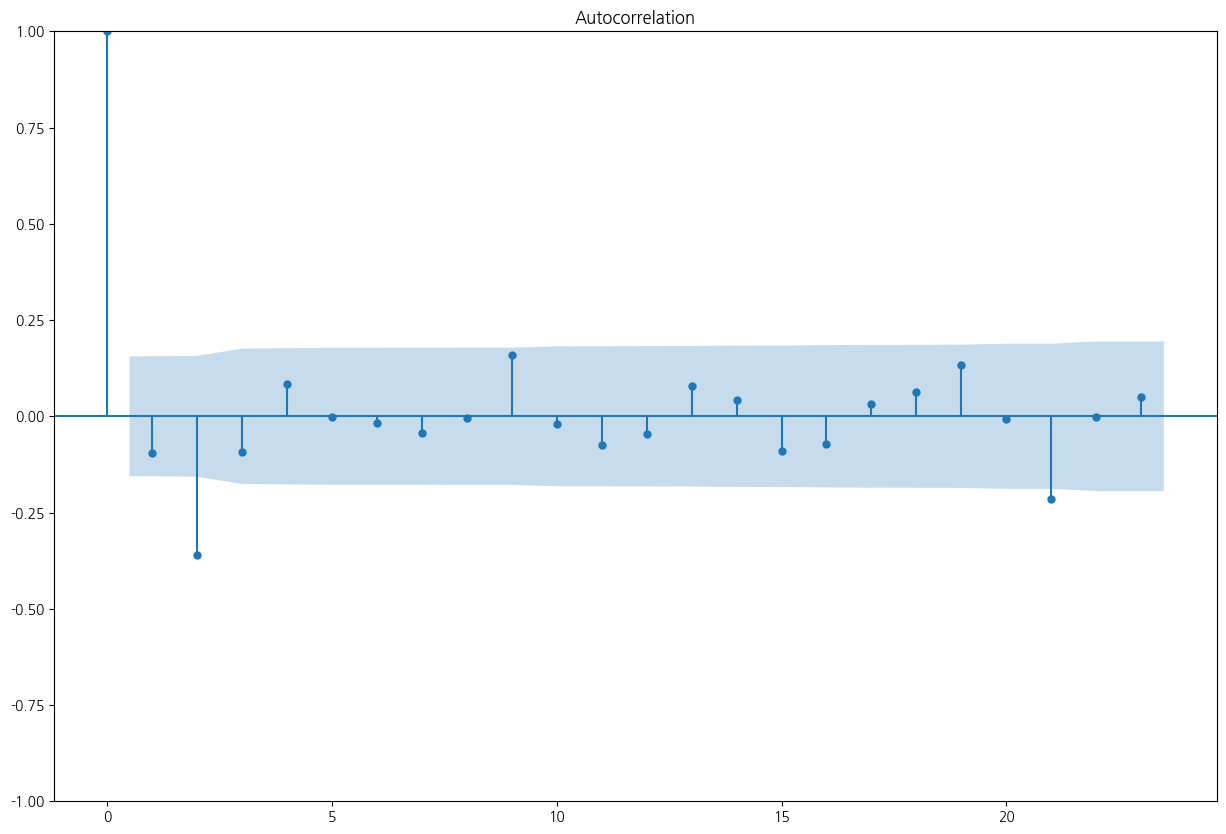

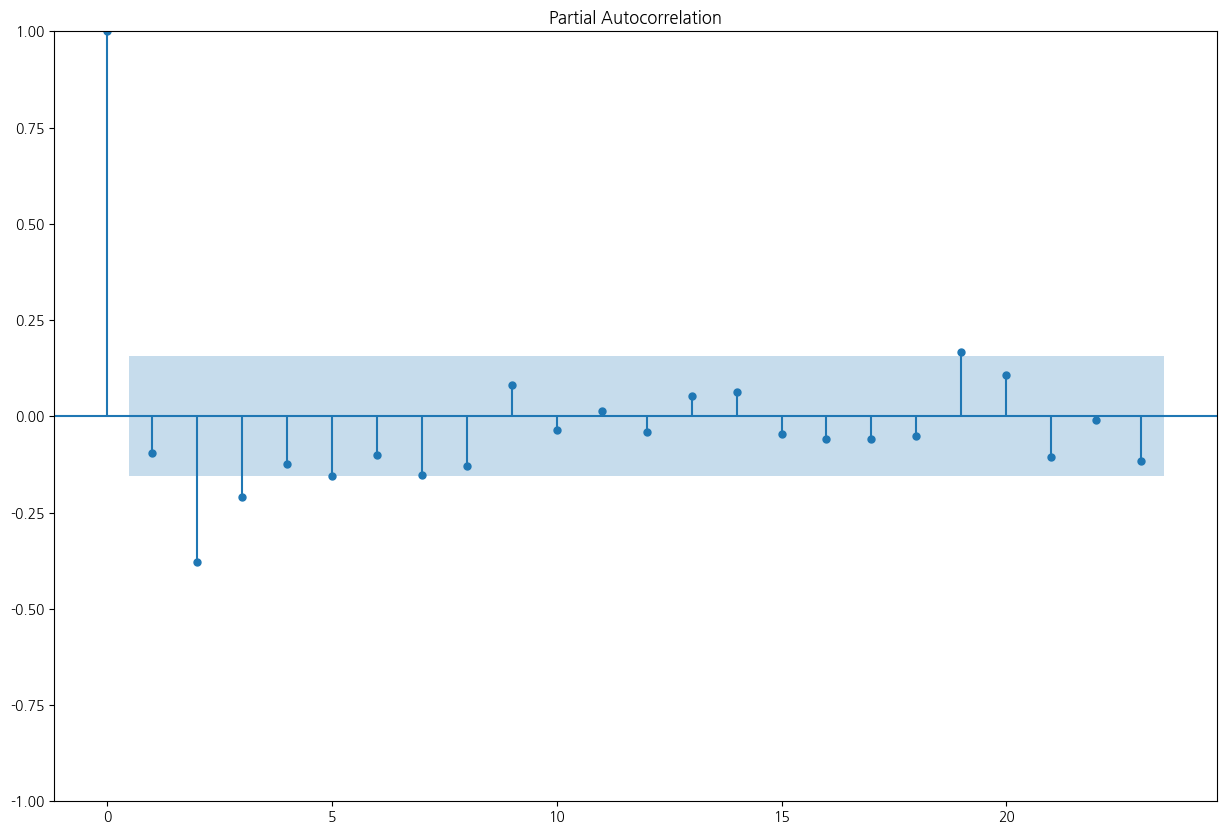

In [386]:
tsa.graphics.plot_acf(df_y2['1st_diff'].dropna())
tsa.graphics.plot_pacf(df_y2['1st_diff'].dropna())
plt.show()

In [389]:
df_y2['seasonal'] = df_y2['접수완료일시'] - df_y2['접수완료일시'].shift(12)

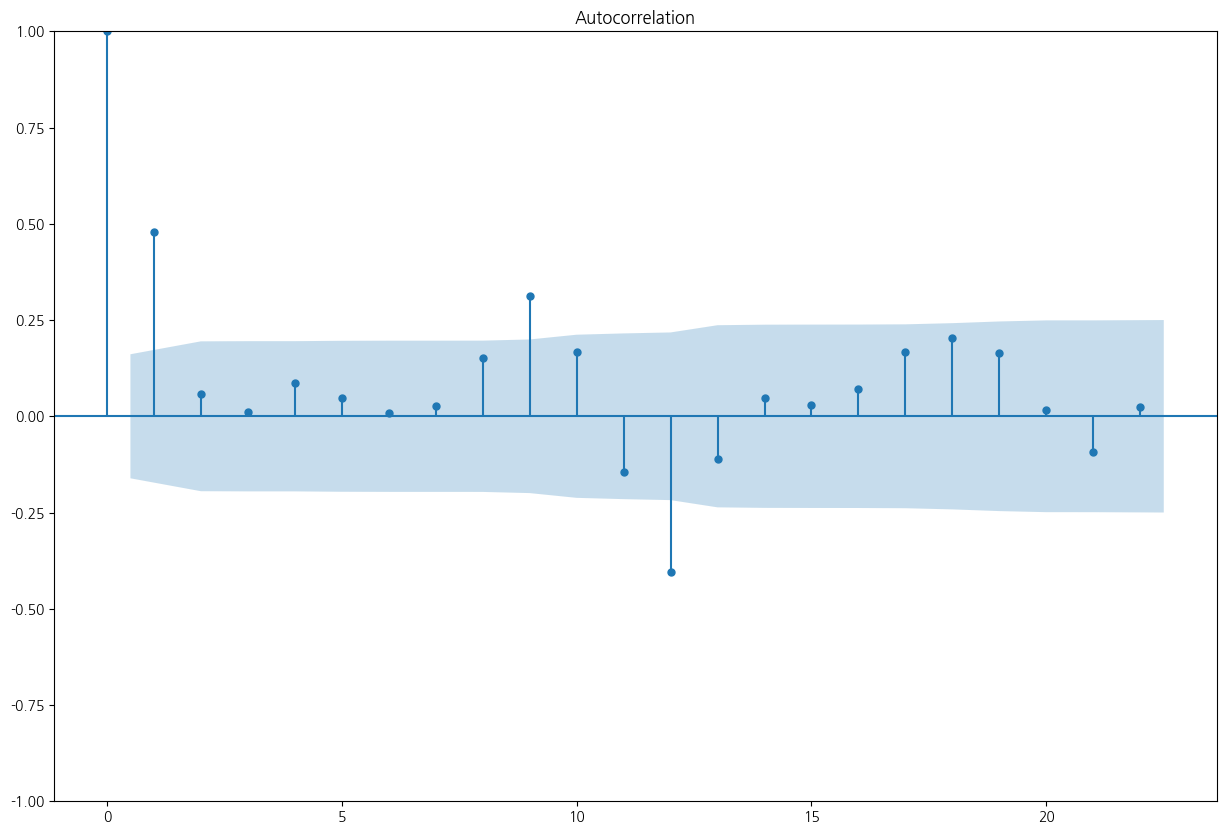

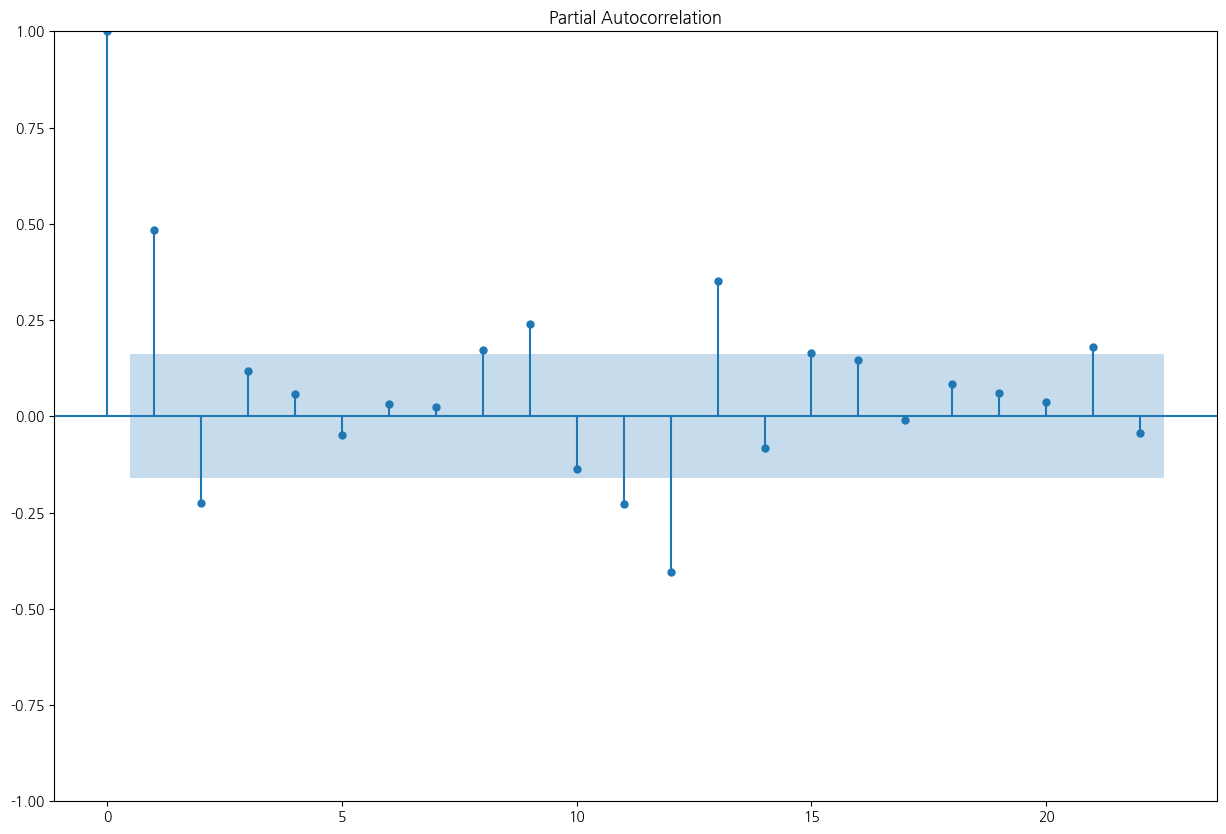

In [390]:
tsa.graphics.plot_acf(df_y2['seasonal'].dropna())
tsa.graphics.plot_pacf(df_y2['seasonal'].dropna())
plt.show()

In [391]:
df_y2['seasonal_1st'] = df_y2['1st_diff'] - df_y2['접수완료일시'].shift(12)

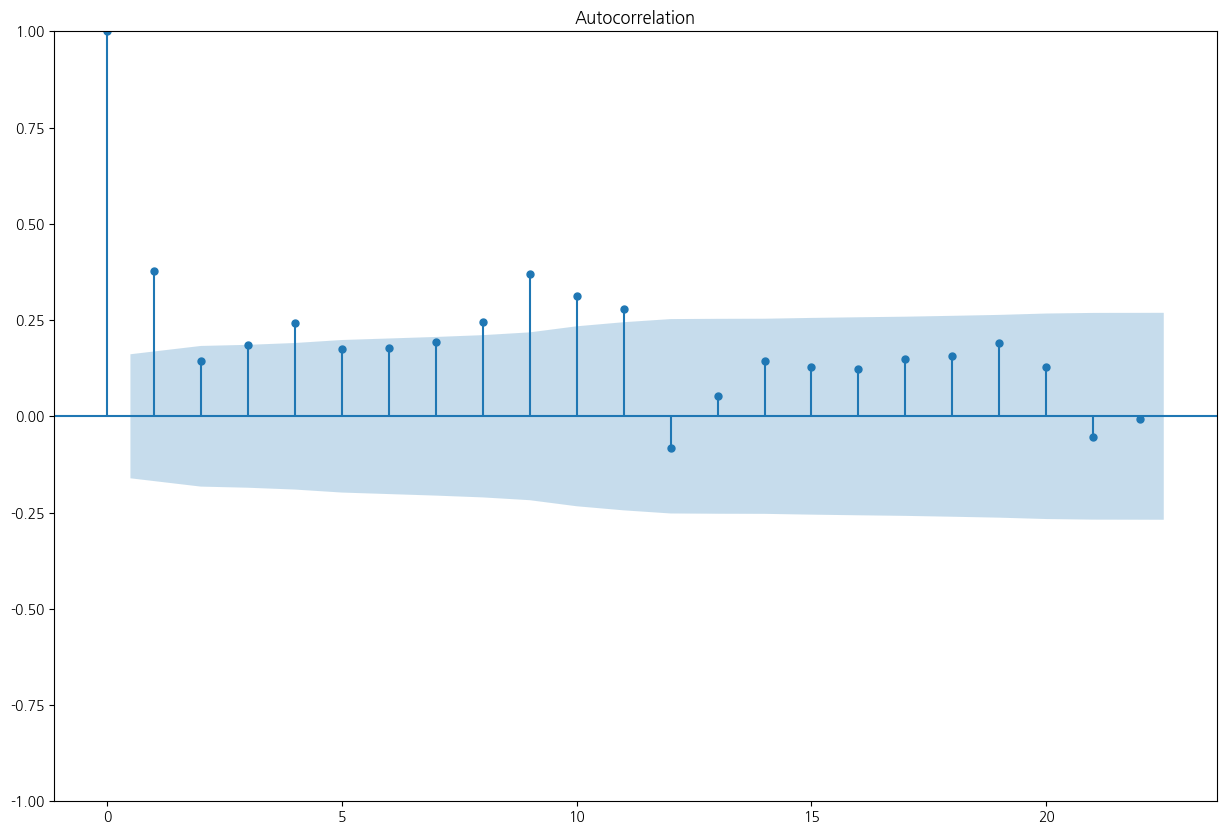

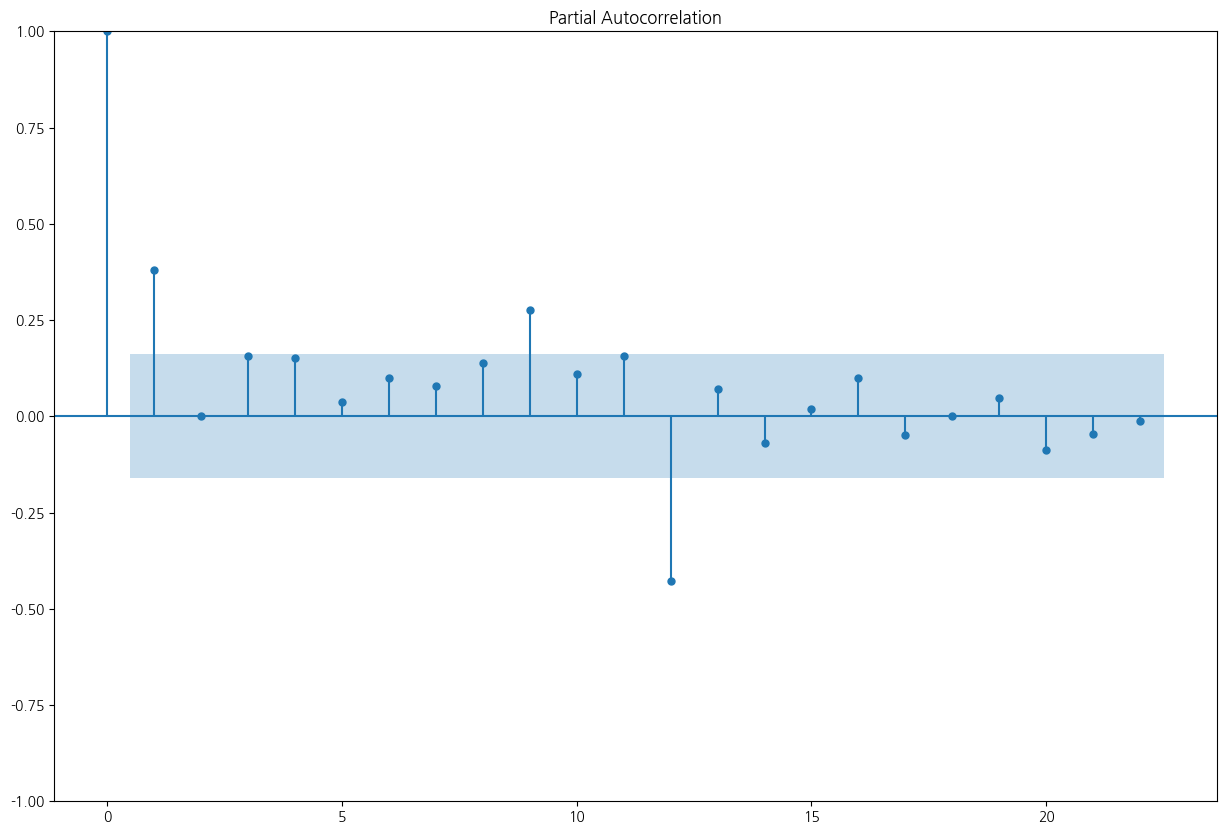

In [392]:
tsa.graphics.plot_acf(df_y2['seasonal_1st'].dropna())
tsa.graphics.plot_pacf(df_y2['seasonal_1st'].dropna())
plt.show()

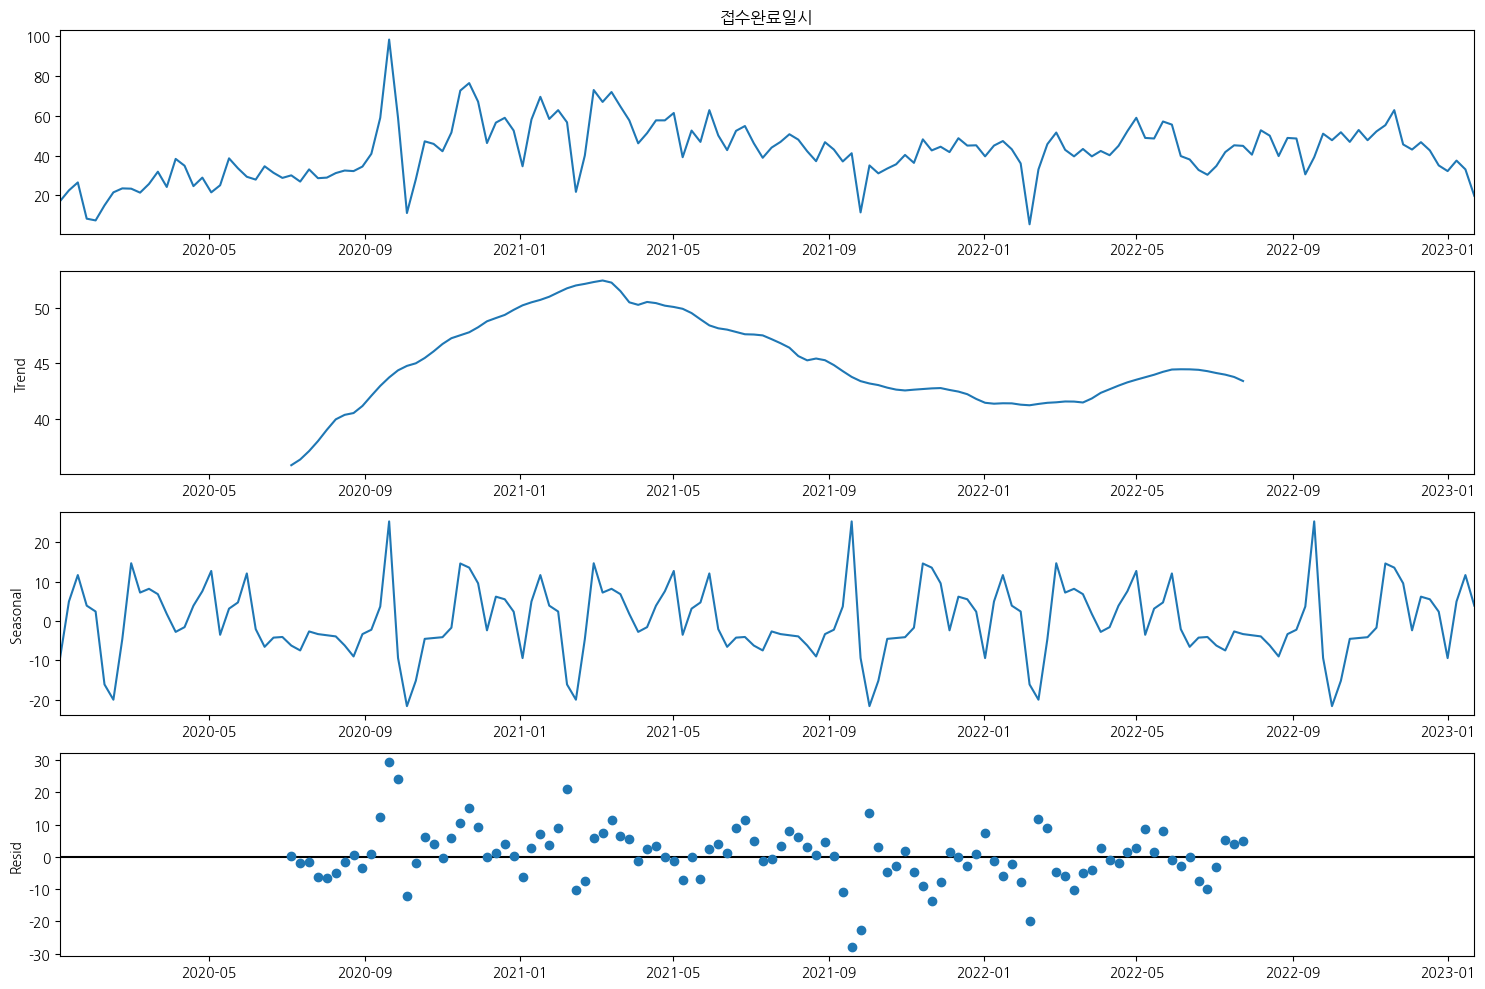

In [331]:
model_series = tsa.seasonal_decompose(y2, model='additive')
fig = model_series.plot()
plt.show()

In [423]:
mod = tsa.statespace.SARIMAX(y2, order=(2,1,2), seasonal_order=(1,1,1,12),
                            enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               접수완료일시   No. Observations:                  160
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -508.765
Date:                              Sun, 12 Feb 2023   AIC                           1031.531
Time:                                      18:26:42   BIC                           1051.711
Sample:                                  01-05-2020   HQIC                          1039.731
                                       - 01-22-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3136      0.290      1.083      0.279      -0.254       0.881
ar.L2         -0.22

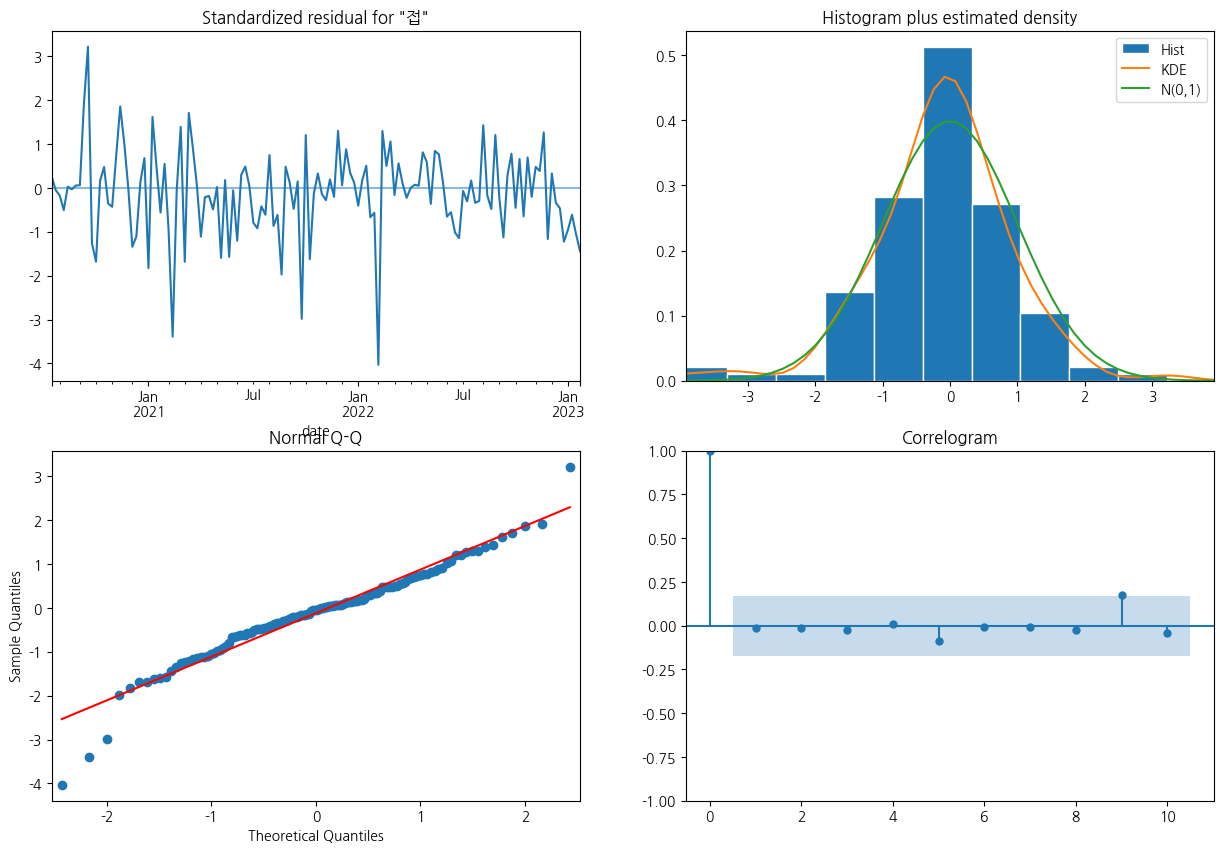

In [425]:
results.plot_diagnostics()
plt.show()

In [426]:
window = int(y2.shape[0] * 0.8)
train = y2.iloc[:window]
test = y2.iloc[window:]

In [427]:
mod = tsa.statespace.SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12),
                            enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               접수완료일시   No. Observations:                  128
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -391.877
Date:                              Sun, 12 Feb 2023   AIC                            797.754
Time:                                      18:27:21   BIC                            815.990
Sample:                                  01-05-2020   HQIC                           805.134
                                       - 06-12-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4884      0.302      1.617      0.106      -0.104       1.081
ar.L2         -0.36

In [428]:
pred = train_results.get_prediction(start=pd.to_datetime('2022-06-19'),end=pd.to_datetime('2023-01-22'),dynamic=True)
pred_conf = pred.conf_int()

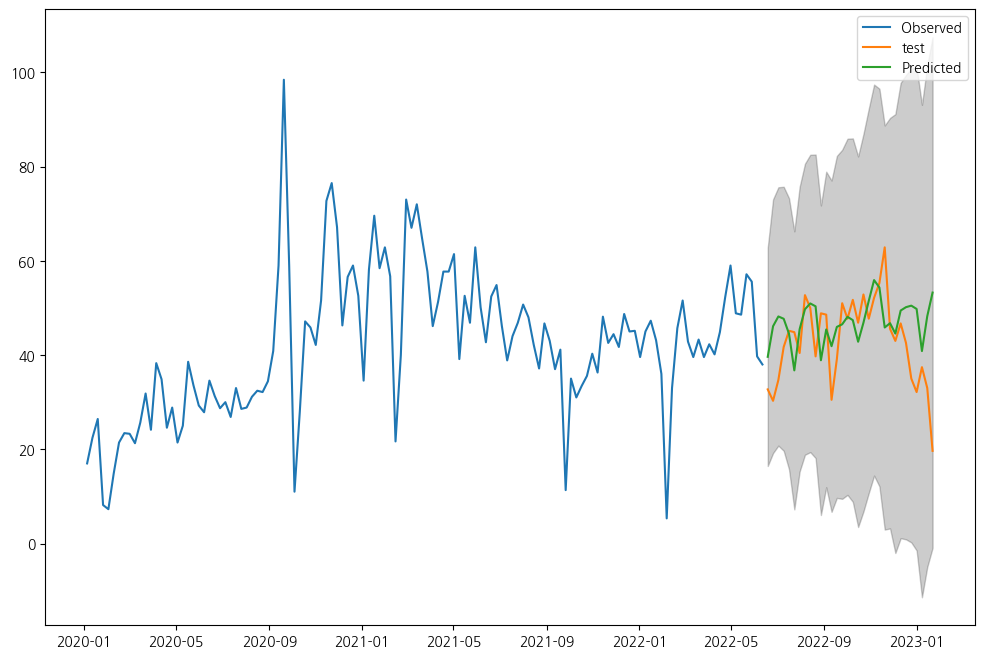

In [429]:
plt.figure(figsize=(12, 8))
plt.plot(train, label="Observed")
plt.plot(test, label='test')
plt.plot(pred.predicted_mean, label="Predicted")
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color="k", alpha=.2)
plt.legend()
plt.show()

In [430]:
# RMSE
(((test - pred.predicted_mean)**2).mean())** 0.5

10.334422540844283

In [431]:
start_date='20230129'
end_date='2023-05-30'
date_list=pd.date_range(start=start_date, end=end_date, freq='W')
date_list

DatetimeIndex(['2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02', '2023-04-09', '2023-04-16',
               '2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [432]:
df_data = pd.DataFrame(index=date_list)

In [433]:
y2_pred = pd.concat([df_y2, df_data])

In [435]:
mod = tsa.statespace.SARIMAX(y2_pred['접수완료일시'], order=(2,1,2), seasonal_order=(1,1,1,12),
                            enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               접수완료일시   No. Observations:                  178
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -508.765
Date:                              Sun, 12 Feb 2023   AIC                           1031.531
Time:                                      18:27:39   BIC                           1052.605
Sample:                                  01-05-2020   HQIC                          1040.093
                                       - 05-28-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3136      0.290      1.083      0.279      -0.254       0.881
ar.L2         -0.22

In [436]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-29'),end=pd.to_datetime('2023-05-28'),dynamic=True)
pred_conf = pred.conf_int()

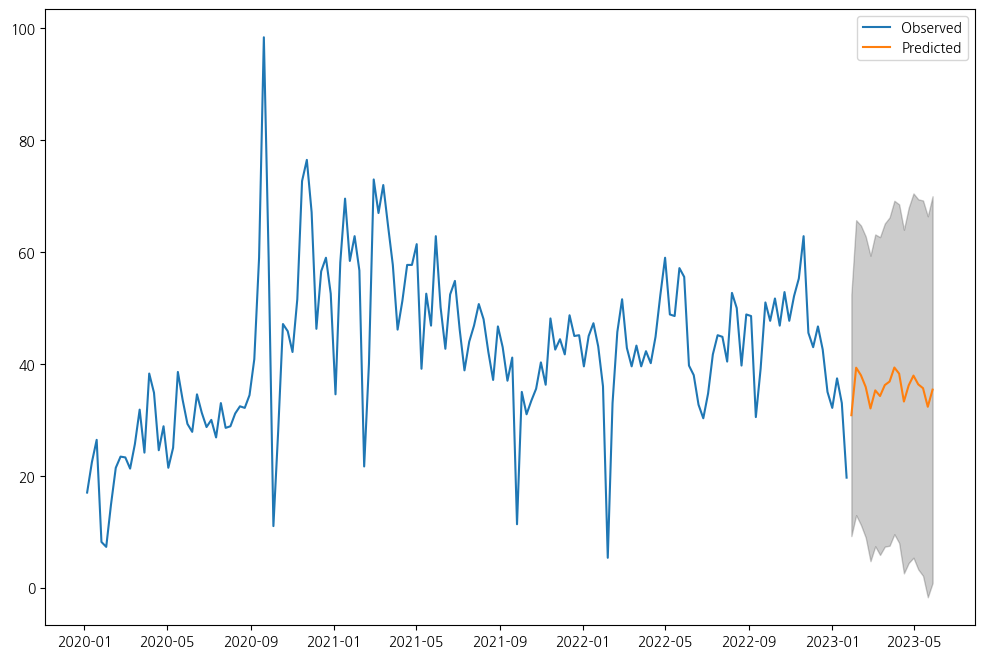

In [437]:
plt.figure(figsize=(12, 8))
plt.plot(df_y2['접수완료일시'], label="Observed")
# plt.plot(test, label='test')
plt.plot(pred.predicted_mean, label="Predicted")
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color="k", alpha=.2)
plt.legend()
plt.show()

In [438]:
pred.predicted_meann 

2023-01-29    30.837360
2023-02-05    39.334325
2023-02-12    37.987276
2023-02-19    35.882703
2023-02-26    32.045242
2023-03-05    35.277774
2023-03-12    34.263642
2023-03-19    36.223873
2023-03-26    36.853602
2023-04-02    39.365848
2023-04-09    38.263528
2023-04-16    33.279198
2023-04-23    36.173056
2023-04-30    37.922439
2023-05-07    36.352594
2023-05-14    35.669152
2023-05-21    32.343586
2023-05-28    35.408073
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [115]:
df_y1['1st_diff'] = df_y1['접수완료일시'] - df_y1['접수완료일시'].shift(1)

In [116]:
result = adfuller(df_y1['1st_diff'].dropna())
print(result)

(-7.45681504961966, 5.484717651898133e-11, 7, 151, {'1%': -3.4744158894942156, '5%': -2.880878382771059, '10%': -2.577081275821236}, 1099.3762750029389)


In [117]:
df_y1['2st_diff'] = df_y1['1st_diff'] - df_y1['접수완료일시'].shift(2)

In [118]:
result = adfuller(df_y1['2st_diff'].dropna())
print(result)

(-2.8252827798304465, 0.05475207121060432, 8, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 1221.105326346401)


In [119]:
df_y1['seasonal_diff'] = df_y1['접수완료일시'] - df_y1['접수완료일시'].shift(12)

In [120]:
df_y1['seasonal_1st_diff'] = df_y1['1st_diff'] - df_y1['접수완료일시'].shift(12)

In [121]:
result = adfuller(df_y1['seasonal_1st_diff'].dropna())
print(result)

(-2.31297633734848, 0.16781699294213331, 11, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 1118.022658616773)


In [122]:
df_y1

,접수완료일시,1st_diff,2st_diff,seasonal_diff,seasonal_1st_diff
date,,,,,
2020-01-05,17.000000,NaN,NaN,NaN,NaN
2020-01-12,22.428571,5.428571,NaN,NaN,NaN
2020-01-19,26.428571,4.000000,-13.000000,NaN,NaN
2020-01-26,8.166667,-18.261905,-40.690476,NaN,NaN
2020-02-02,7.285714,-0.880952,-27.309524,NaN,NaN
...,...,...,...,...,...
2022-12-25,35.000000,-7.571429,-54.285714,-12.714286,-55.285714
2023-01-01,32.142857,-2.857143,-45.428571,-19.571429,-54.571429
2023-01-08,37.428571,5.285714,-29.714286,-9.428571,-41.571429


<AxesSubplot: xlabel='date'>

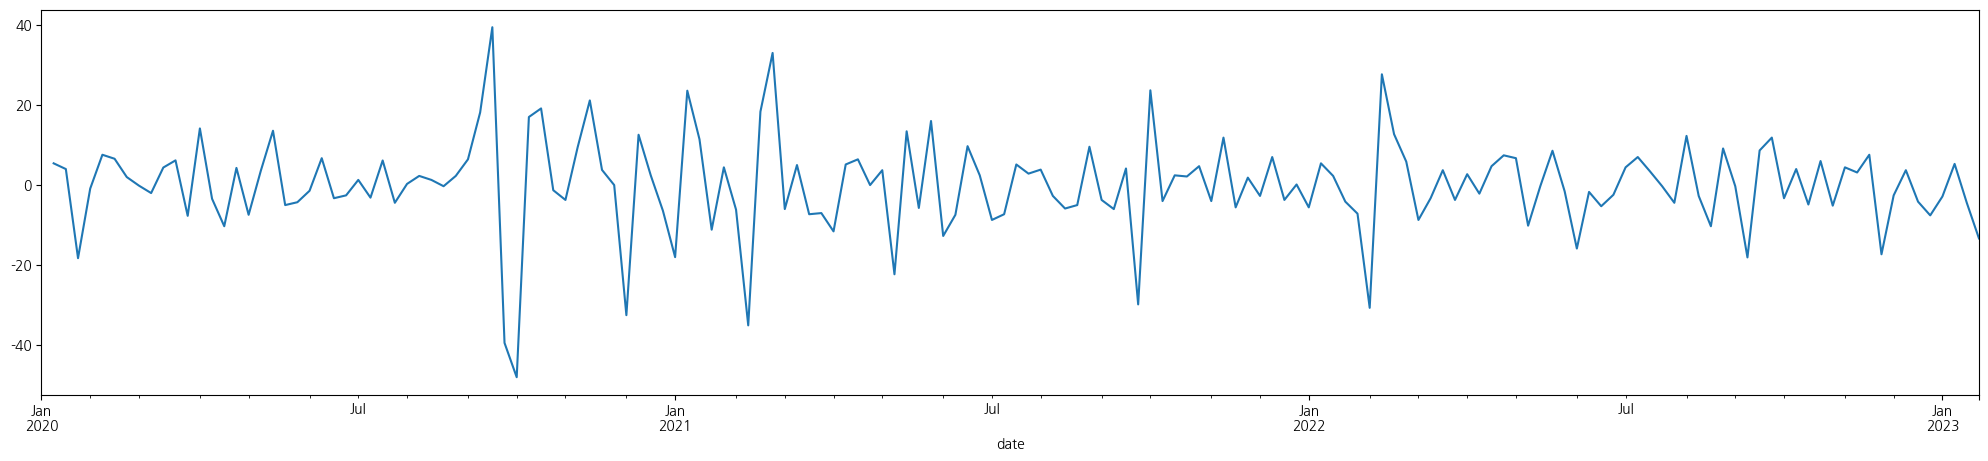

In [123]:
plt.figure(figsize=(25,5))
df_y1['1st_diff'].plot()

<AxesSubplot: xlabel='date'>

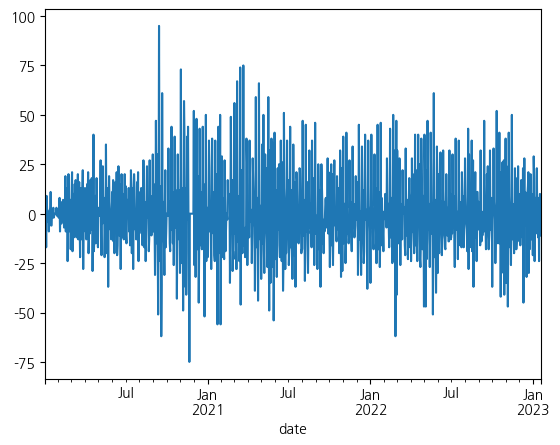

In [73]:
df_y1['1st_diff'].plot()

<AxesSubplot: xlabel='date'>

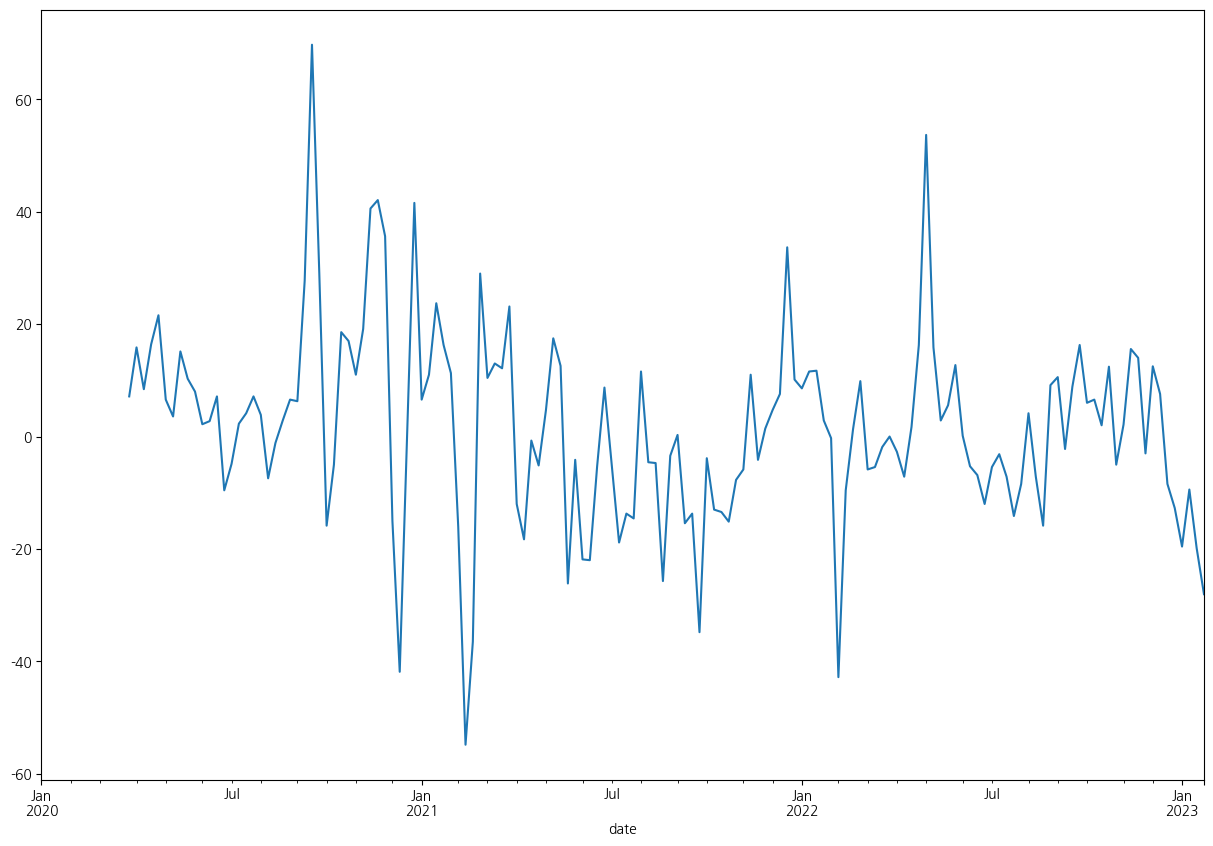

In [142]:
df_y1['seasonal_diff'].plot()

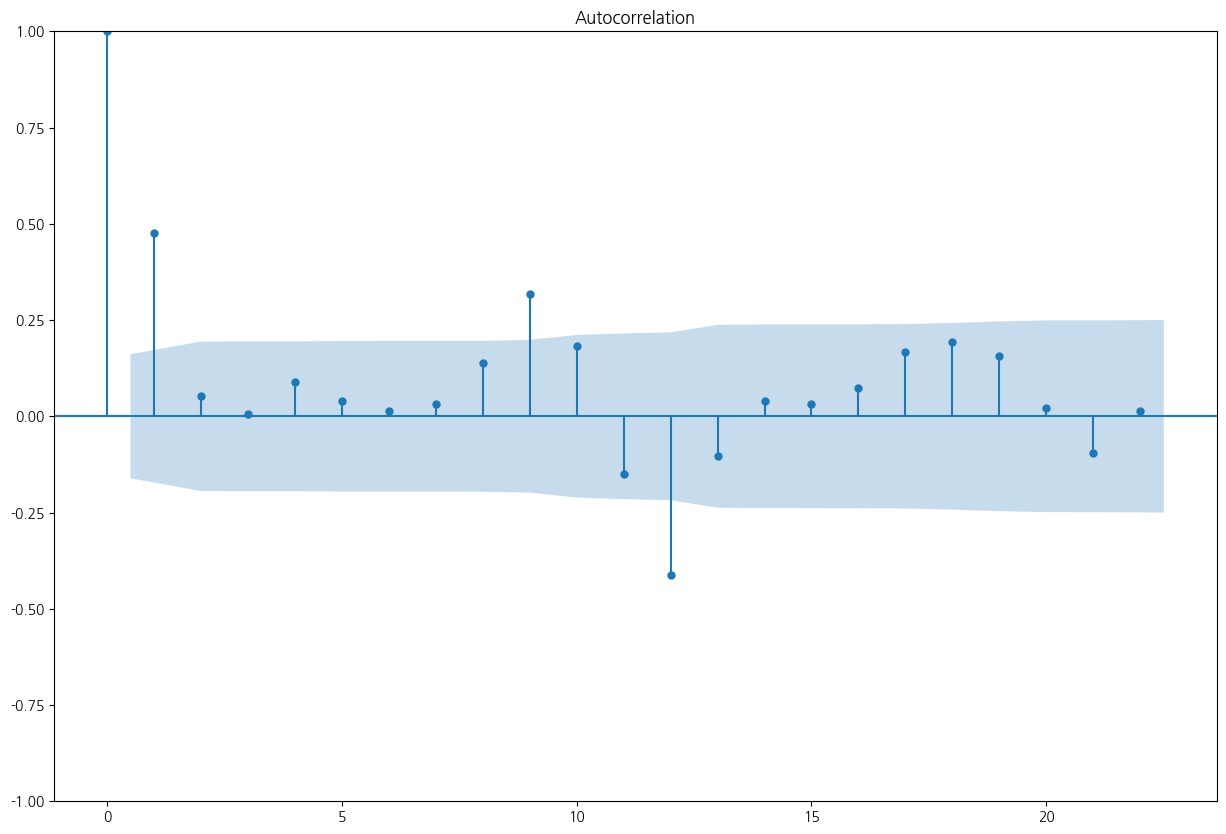

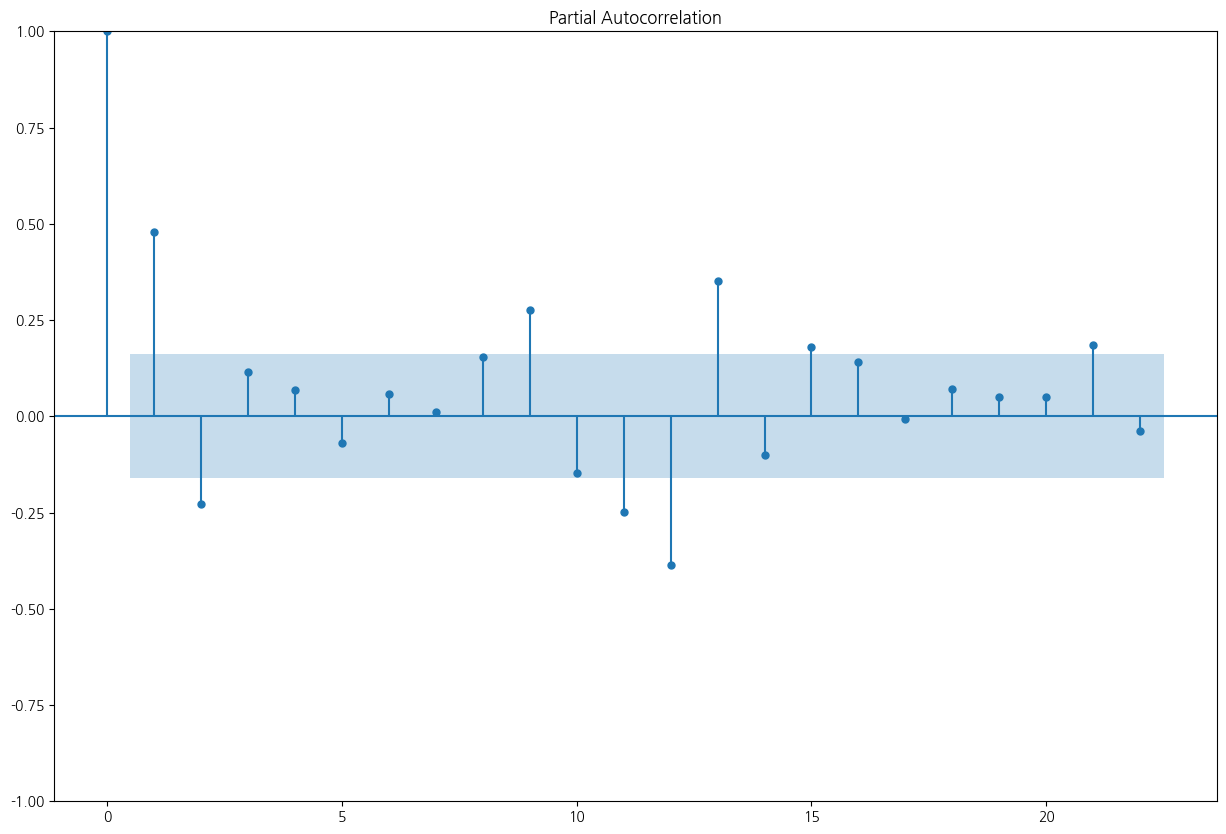

In [254]:
tsa.graphics.plot_acf(df_y1['seasonal_diff'].dropna())
tsa.graphics.plot_pacf(df_y1['seasonal_diff'].dropna())
plt.show()

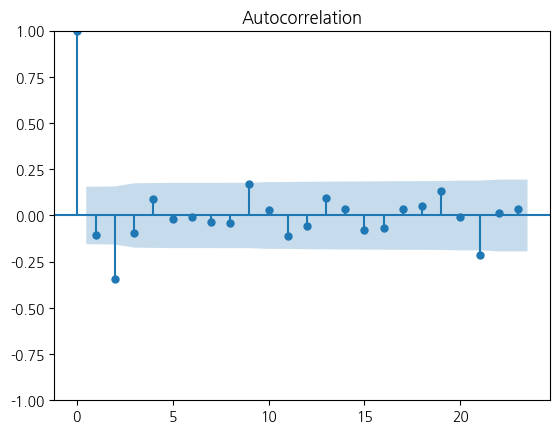

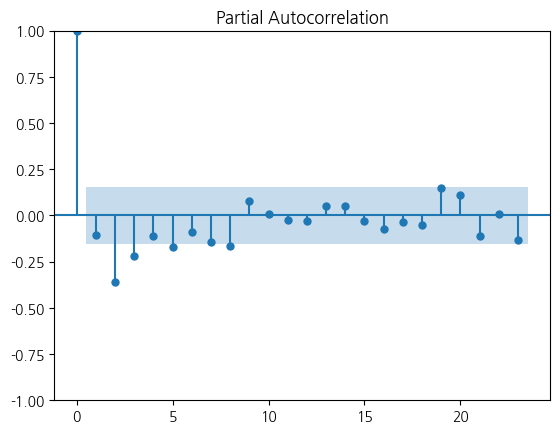

In [125]:
tsa.graphics.plot_acf(df_y1['1st_diff'].dropna())
tsa.graphics.plot_pacf(df_y1['1st_diff'].dropna())
plt.show()

In [126]:
from pylab import rcParams

rcParams['figure.figsize']=15,10

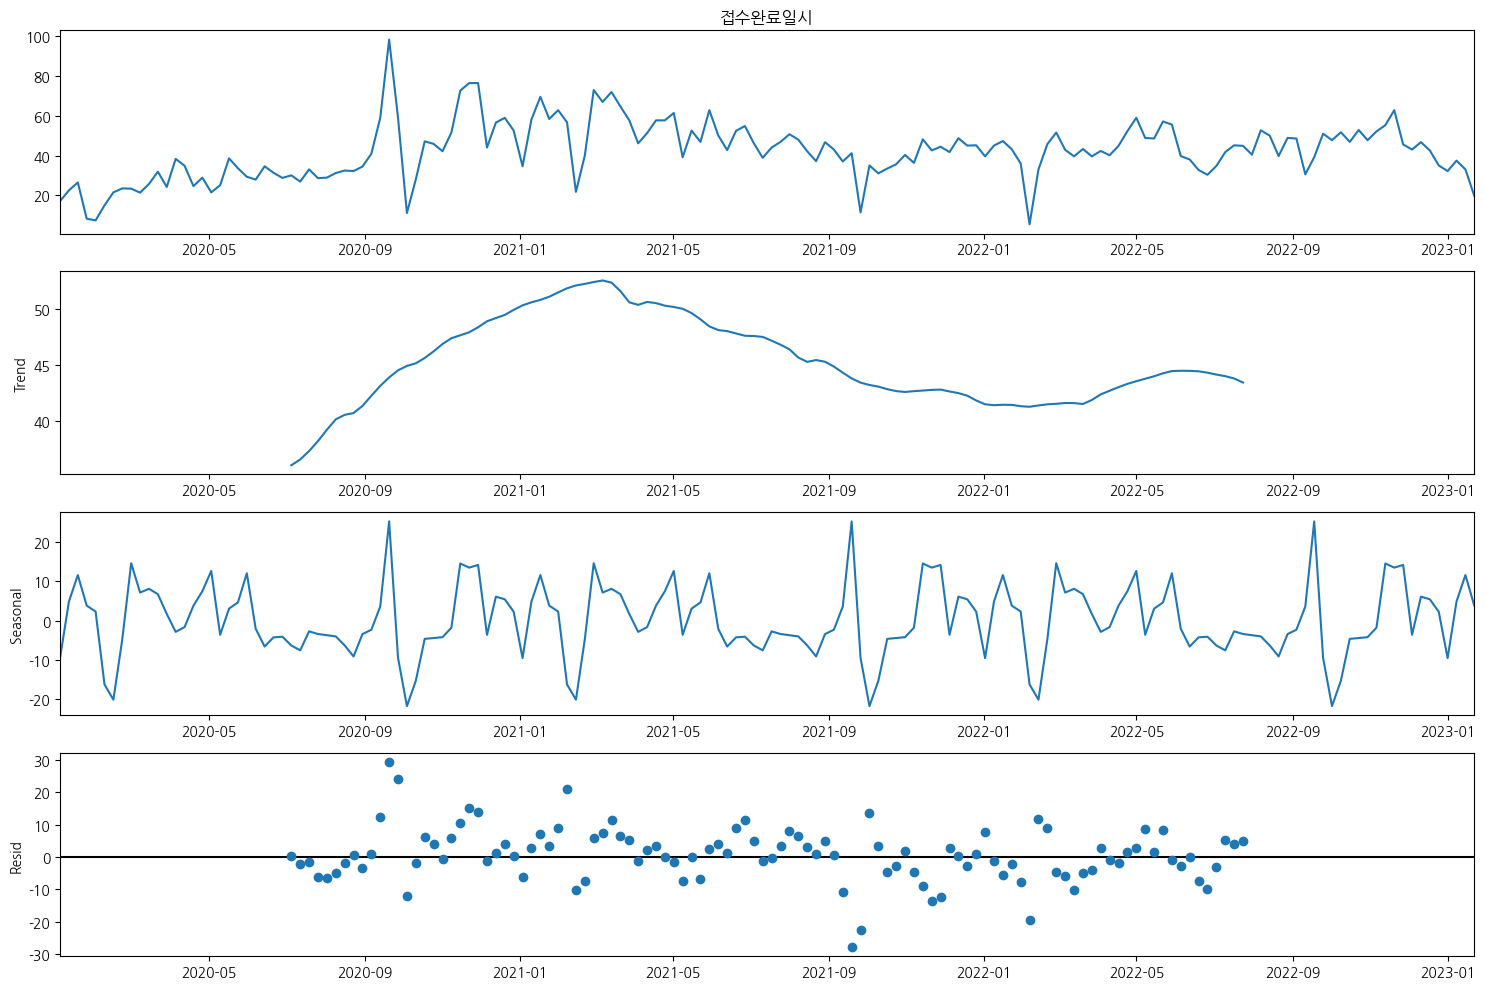

In [127]:
# 시계열 모델 생성
# 7일 주기로 계절성 확인
model_series = tsa.seasonal_decompose(y1, model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

In [16]:
import itertools

In [17]:
p = d = q = range(0,2)
pdq=list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [20]:
param_list=[]
param_seasonal_list=[]
results_AIC_list=[]

In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                        seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [22]:
ARIMA_list = pd.DataFrame({'Parameter':param_list, 'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [23]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 12)",9783.751967
47,"(1, 0, 1)","(1, 1, 1, 12)",9804.628220
61,"(1, 1, 1)","(1, 0, 1, 12)",9810.074237
57,"(1, 1, 1)","(0, 0, 1, 12)",9810.654567
15,"(0, 0, 1)","(1, 1, 1, 12)",9828.540819
...,...,...,...
2,"(0, 0, 0)","(0, 1, 0, 12)",11080.975363
1,"(0, 0, 0)","(0, 0, 1, 12)",11259.207704
50,"(1, 1, 0)","(0, 1, 0, 12)",11273.923231
18,"(0, 1, 0)","(0, 1, 0, 12)",11274.944960


In [265]:
mod = tsa.statespace.SARIMAX(y1, order=(2,1,2), seasonal_order=(2,1,3,12),
                            enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                     접수완료일시   No. Observations:                  160
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -406.940
Date:                                    Sun, 12 Feb 2023   AIC                            833.879
Time:                                            16:48:11   BIC                            860.701
Sample:                                        01-05-2020   HQIC                           844.754
                                             - 01-22-2023                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3602      0.246     -1.464      0

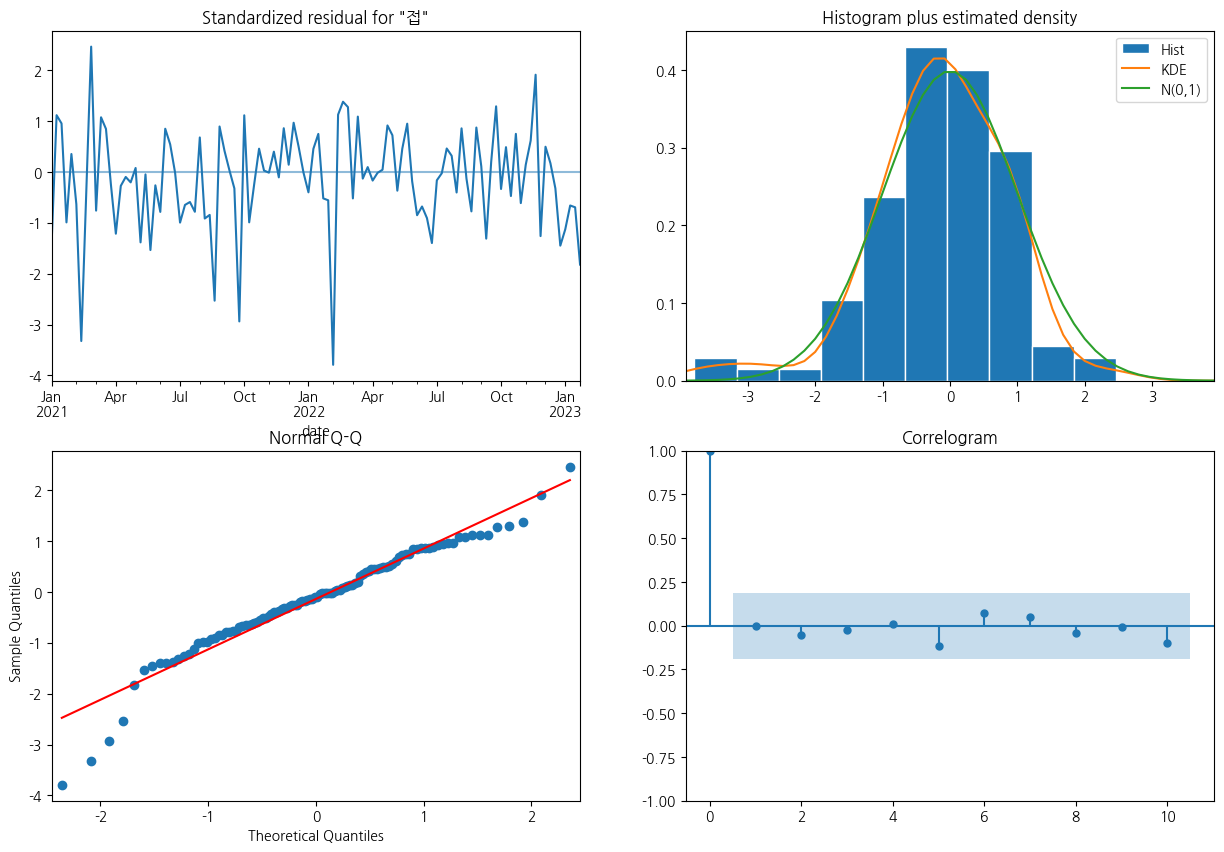

In [266]:
results.plot_diagnostics()
plt.show()

In [275]:
window = int(y1.shape[0] * 0.8)
train = y1.iloc[:window]
test = y1.iloc[window:]

In [299]:
train_mod = tsa.statespace.SARIMAX(train, order=(2,1,2), seasonal_order=(3,1,1,12),
                            enforce_stationarity=False, enforce_invertibility=False)
train_results=train_mod.fit()
print(train_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               접수완료일시   No. Observations:                  128
Model:             SARIMAX(2, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -299.656
Date:                              Sun, 12 Feb 2023   AIC                            617.312
Time:                                      16:50:43   BIC                            638.406
Sample:                                  01-05-2020   HQIC                           625.749
                                       - 06-12-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0319      0.625      0.051      0.959      -1.194       1.258
ar.L2         -0.09

In [300]:
train

date
2020-01-05    17.000000
2020-01-12    22.428571
2020-01-19    26.428571
2020-01-26     8.166667
2020-02-02     7.285714
                ...    
2022-05-15    48.571429
2022-05-22    57.142857
2022-05-29    55.571429
2022-06-05    39.714286
2022-06-12    38.000000
Freq: W-SUN, Name: 접수완료일시, Length: 128, dtype: float64

In [301]:
test

date
2022-06-19    32.714286
2022-06-26    30.285714
2022-07-03    34.714286
2022-07-10    41.714286
2022-07-17    45.142857
2022-07-24    44.857143
2022-07-31    40.428571
2022-08-07    52.714286
2022-08-14    50.000000
2022-08-21    39.714286
2022-08-28    48.857143
2022-09-04    48.571429
2022-09-11    30.500000
2022-09-18    39.142857
2022-09-25    51.000000
2022-10-02    47.714286
2022-10-09    51.714286
2022-10-16    46.857143
2022-10-23    52.857143
2022-10-30    47.714286
2022-11-06    52.142857
2022-11-13    55.285714
2022-11-20    62.857143
2022-11-27    45.571429
2022-12-04    43.000000
2022-12-11    46.714286
2022-12-18    42.571429
2022-12-25    35.000000
2023-01-01    32.142857
2023-01-08    37.428571
2023-01-15    33.000000
2023-01-22    19.666667
Freq: W-SUN, Name: 접수완료일시, dtype: float64

In [302]:
pred = train_results.get_prediction(start=pd.to_datetime('2022-06-19'),end=pd.to_datetime('2023-01-22'),dynamic=True)
pred_conf = pred.conf_int()

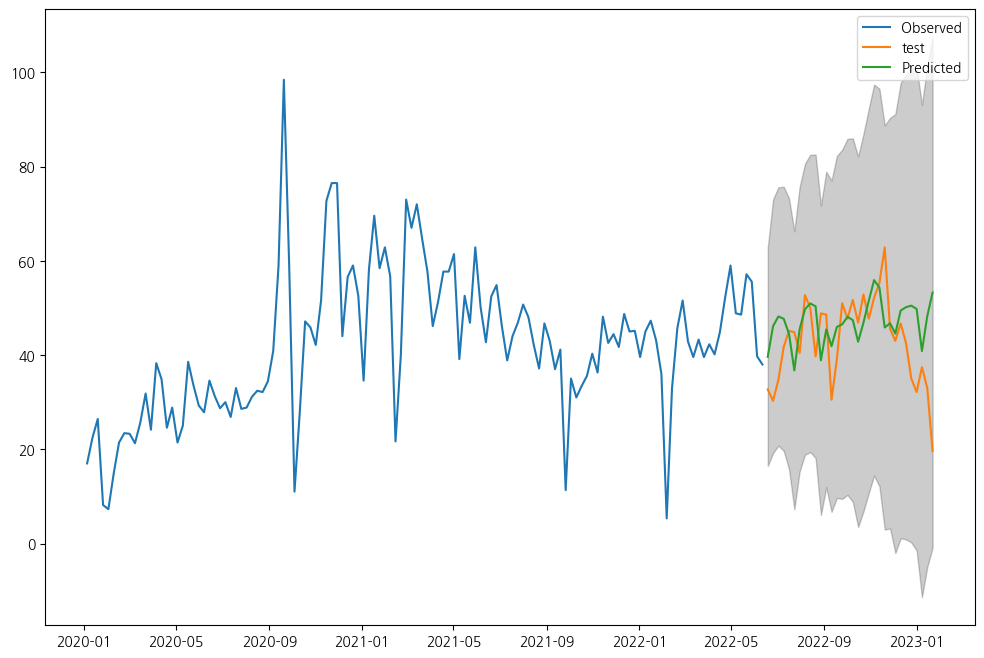

In [303]:
plt.figure(figsize=(12, 8))
plt.plot(train, label="Observed")
plt.plot(test, label='test')
plt.plot(pred.predicted_mean, label="Predicted")
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color="k", alpha=.2)
plt.legend()
plt.show()

<AxesSubplot: xlabel='date', ylabel='접수완료일시'>

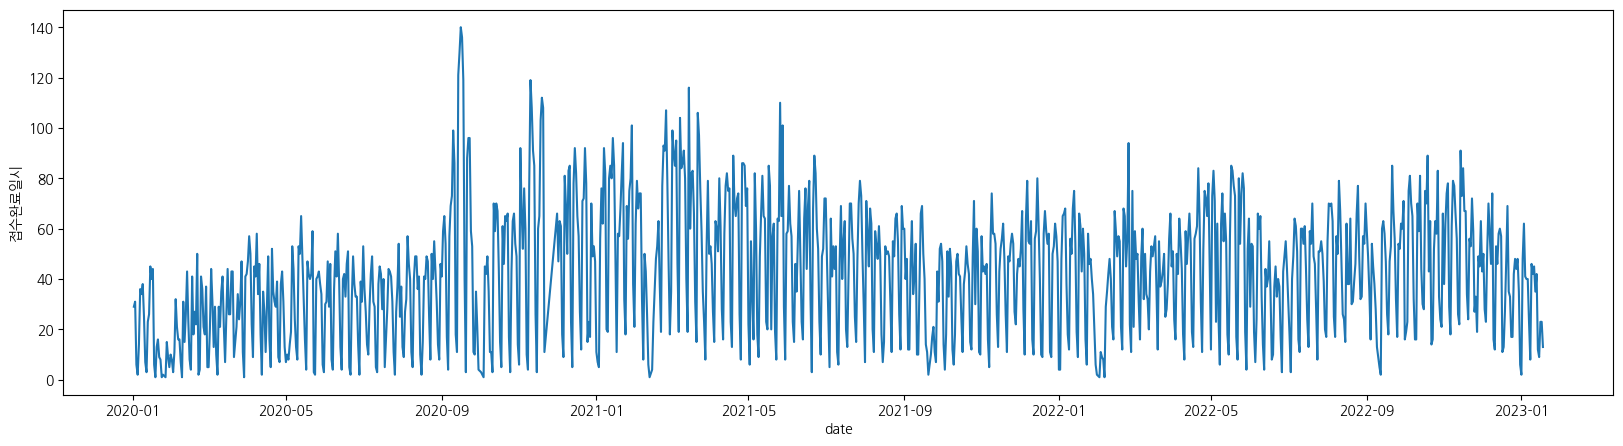

In [442]:
plt.figure(figsize=(20,5))
sns.lineplot(data=p1, x='date', y='접수완료일시')

In [439]:
df

,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,date,year,month,day,hour,ym,weekofday
0,충남청,2020-01-02 09:33:49,충남청,종결요청,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020-01-02,2020,1,2,9,2020-1,Thursday
1,충남청,2020-01-02 09:42:45,충남청,종결요청,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020-01-02,2020,1,2,9,2020-1,Thursday
2,충남청,2020-01-02 10:23:29,충남청,종결요청,불상,충청남도 서산시 대산읍 대산리(행정:대산읍) 688-1,126.426100,36.947617,NaN,2020-01-02,2020,1,2,10,2020-1,Thursday
3,대전청,2020-01-02 10:46:31,대전청,종결요청,불상,대전광역시 유성구 대정동(행정:진잠동) 1-4,127.336373,36.317773,NaN,2020-01-02,2020,1,2,10,2020-1,Thursday
4,충남청,2020-01-02 11:00:20,충남청,종결요청,불상,충청남도 논산시 내동(행정:취암동) 1113,127.104068,36.182762,NaN,2020-01-02,2020,1,2,11,2020-1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46263,충남청,2023-01-18 12:44:04,충남청,종결요청,여성,NaN,NaN,NaN,NaN,2023-01-18,2023,1,18,12,2023-1,Wednesday
46264,충남청,2023-01-18 13:31:19,충남청,종결요청,불상,NaN,NaN,NaN,NaN,2023-01-18,2023,1,18,13,2023-1,Wednesday
46265,대전청,2023-01-18 16:17:02,대전청,종결요청,여성,대전광역시 대덕구 신일동 (행정:목상동 ) 1687-6,127.406900,36.437929,NaN,2023-01-18,2023,1,18,16,2023-1,Wednesday
46266,충남청,2023-01-18 18:38:01,세종청,종결요청,여성,세종특별자치시 세종시 연서면 봉암리(연서면 ) 54-89,127.284535,36.565027,Y,2023-01-18,2023,1,18,18,2023-1,Wednesday


### 충남청

In [443]:
df_충남 = df[df['접수부서']=='충남청']

<AxesSubplot: xlabel='hour', ylabel='count'>

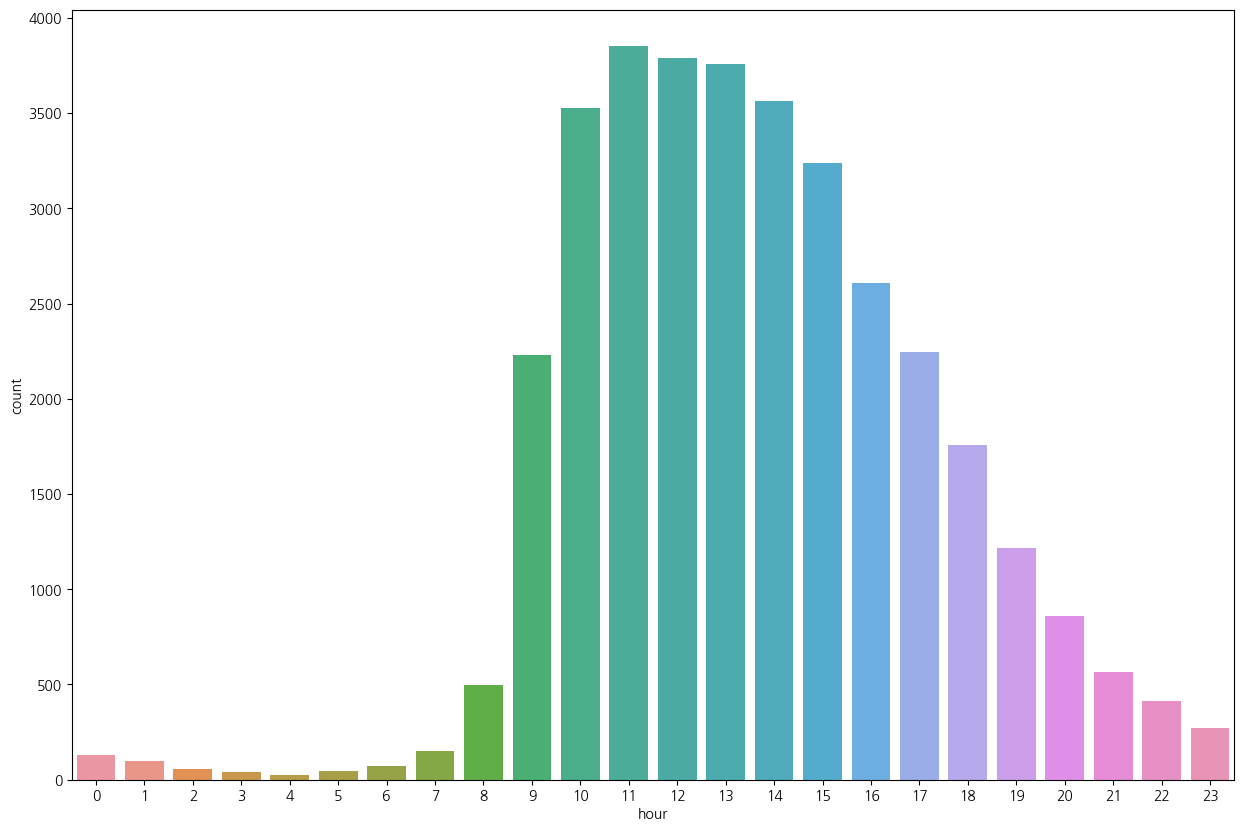

In [447]:
sns.countplot(data=df_충남, x='hour')

<AxesSubplot: xlabel='weekofday', ylabel='count'>

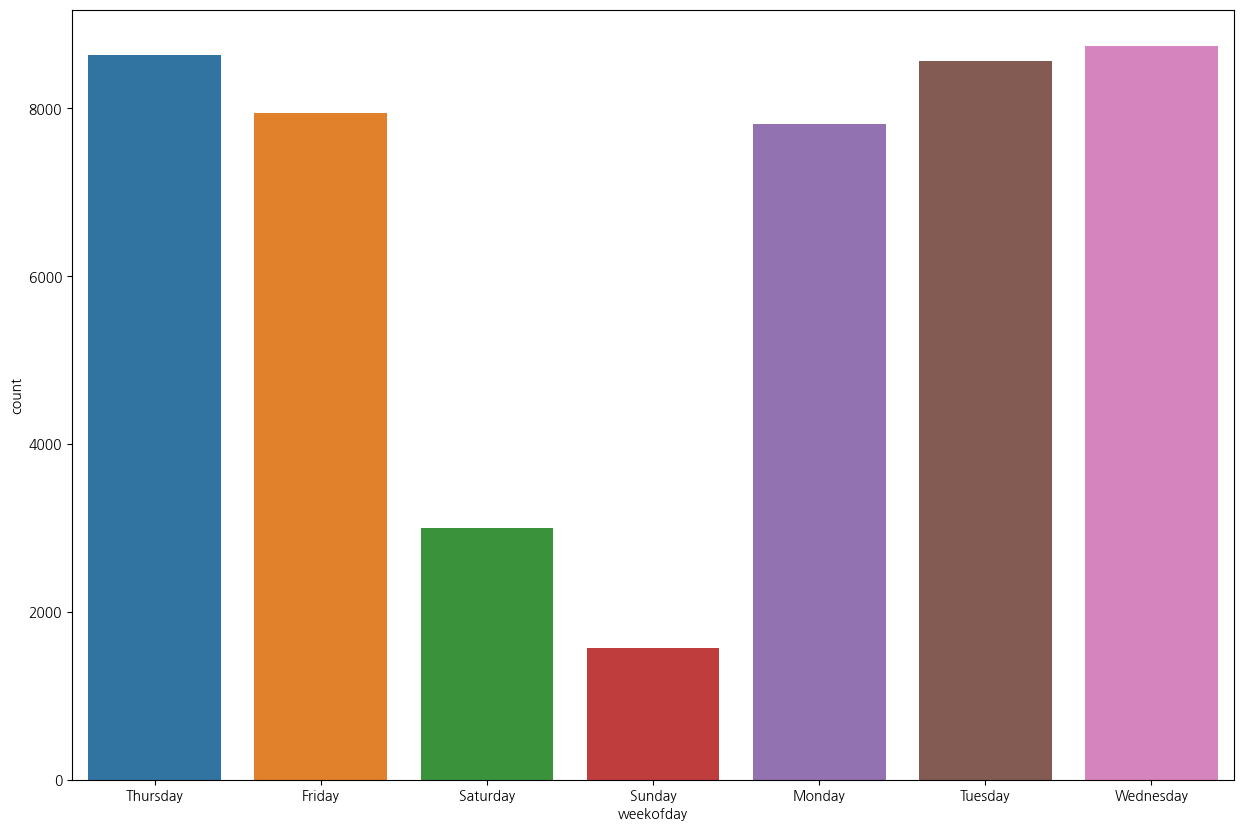

In [440]:
sns.countplot(data=df, x='weekofday')

<AxesSubplot: xlabel='month', ylabel='count'>

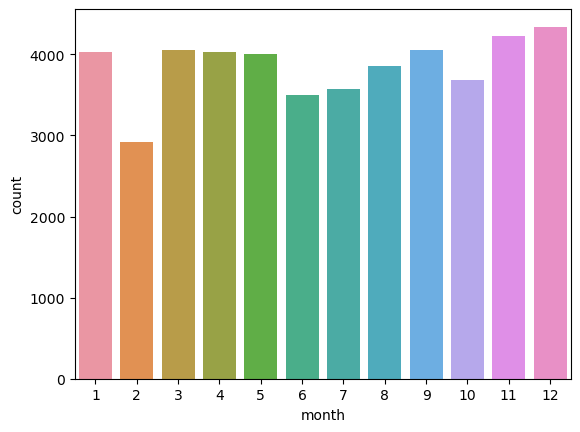

In [20]:
sns.countplot(data=df, x='month')

<AxesSubplot: xlabel='hour', ylabel='count'>

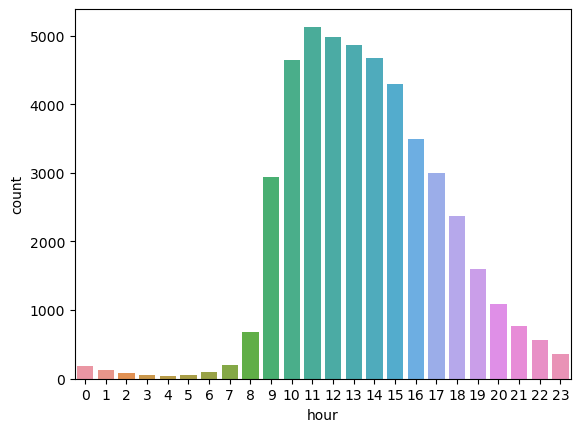

In [23]:
sns.countplot(data=df, x='hour')

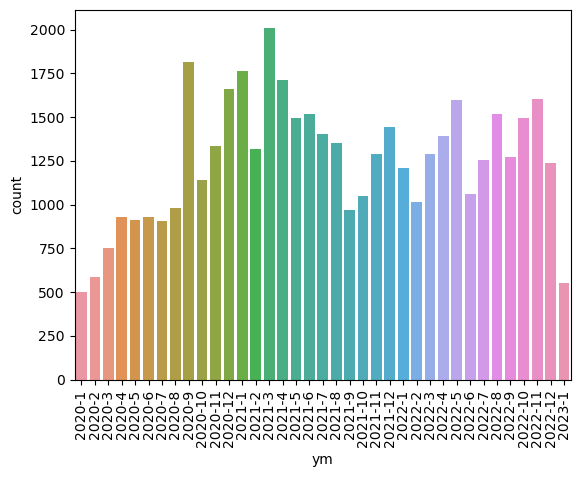

In [31]:
sns.countplot(data=df, x='ym')
plt.xticks(rotation=90);

<AxesSubplot: xlabel='성별', ylabel='count'>

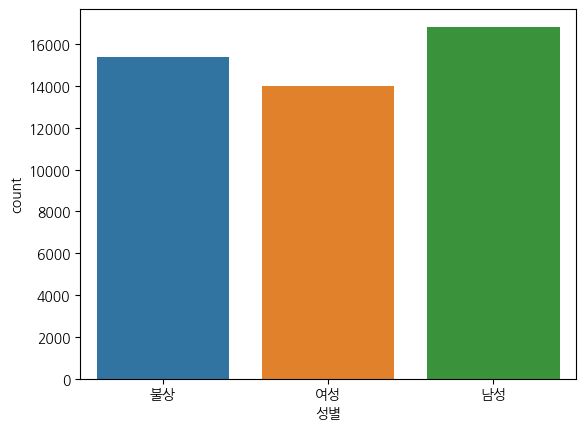

In [36]:
sns.countplot(data=df, x='성별')

<AxesSubplot: xlabel='접수부서', ylabel='count'>

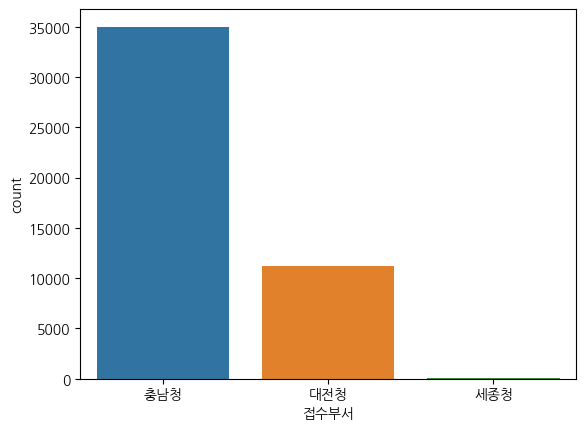

In [43]:
sns.countplot(data=df, x='접수부서')

In [61]:
df_1 = df[df['접수부서']=='충남청'].dropna()
df_1

,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,year,month,day,hour,ym
35509,충남청,2020-01-02 15:48:34,충남청,종결요청,불상,세종특별자치시 세종시 전동면 노장리(행정:전동면) 440-2,127.272998,36.659795,Y,2020,1,2,15,2020-1
35510,충남청,2020-01-02 15:51:57,충남청,종결요청,불상,세종특별자치시 세종시 전동면 노장리(행정:전동면) 440-2,127.272998,36.659795,Y,2020,1,2,15,2020-1
35499,충남청,2020-01-02 17:32:12,충남청,종결요청,불상,충청남도 서천군 판교면 상좌리(행정:판교면) 245,126.658112,36.155138,Y,2020,1,2,17,2020-1
35501,충남청,2020-01-02 17:43:50,충남청,종결요청,불상,충청남도 서천군 판교면 상좌리(행정:판교면) 245,126.658112,36.155138,Y,2020,1,2,17,2020-1
35506,충남청,2020-01-02 18:28:33,충남청,종결요청,불상,충청남도 천안시 동남구 대흥동(행정:중앙동) 57-1,127.147308,36.809246,Y,2020,1,2,18,2020-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35132,충남청,2023-01-17 19:42:43,충남청,종결요청,여성,충청남도 아산시 배방읍 북수리(배방읍 ) 723,127.063010,36.768848,Y,2023,1,17,19,2023-1
35151,충남청,2023-01-17 19:59:43,충남청,종결요청,여성,충청남도 아산시 배방읍 북수리(배방읍 ) 723,127.063115,36.768918,Y,2023,1,17,19,2023-1
35452,충남청,2023-01-17 20:26:05,충남청,종결요청,여성,충청남도 공주시 옥룡동 (행정:옥룡동 ) 247-2,127.128745,36.453144,Y,2023,1,17,20,2023-1
35451,충남청,2023-01-17 20:28:51,충남청,종결요청,여성,충청남도 공주시 옥룡동 (옥룡동 ) 247-2,127.128745,36.453144,Y,2023,1,17,20,2023-1


In [62]:
df_1[df_1['발생지점'].str.contains('서북구')]

,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,year,month,day,hour,ym
35566,충남청,2020-01-06 15:42:16,충남청,종결요청,불상,충청남도 천안시 서북구 입장면 신덕리(입장면) 107-7,127.211389,36.903611,Y,2020,1,6,15,2020-1
35567,충남청,2020-01-06 15:46:05,충남청,종결요청,불상,충청남도 천안시 서북구 입장면 신덕리(입장면) 107-7,127.211389,36.903611,Y,2020,1,6,15,2020-1
35594,충남청,2020-01-07 13:50:13,충남청,종결요청,불상,충청남도 천안시 서북구 업성동(행정:부성1동) 174-1,127.136781,36.857740,Y,2020,1,7,13,2020-1
35597,충남청,2020-01-07 14:01:35,충남청,종결요청,불상,충청남도 천안시 서북구 불당동(행정:불당동),127.104757,36.803385,Y,2020,1,7,14,2020-1
35598,충남청,2020-01-07 14:07:02,충남청,종결요청,불상,충청남도 천안시 서북구 불당동(행정:불당동),127.104757,36.803385,Y,2020,1,7,14,2020-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,충남청,2022-12-21 10:36:32,충남청,종결요청,여성,충청남도 천안시 서북구 쌍용동 (쌍용1동 ) 886,127.131565,36.807287,Y,2022,12,21,10,2022-12
34715,충남청,2022-12-25 18:23:56,충남청,종결요청,남성,충청남도 천안시 서북구 백석동 (행정:백석동 ) 900,127.120588,36.819800,Y,2022,12,25,18,2022-12
35106,충남청,2023-01-09 01:19:58,충남청,종결요청,남성,충청남도 천안시 서북구 쌍용동 (행정:쌍용1동 ) 210-50,127.128338,36.796914,Y,2023,1,9,1,2023-1
35104,충남청,2023-01-09 01:36:00,충남청,종결요청,남성,충청남도 천안시 서북구 쌍용동 (행정:쌍용1동 ) 210-50,127.128338,36.796914,Y,2023,1,9,1,2023-1
